### Importación de datos



In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


In [26]:
import pandas as pd

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda1 = pd.read_csv(url)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

tienda.head()


,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon
0,Asistente virtual,Electrónicos,164300.0,6900.0,16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.60971,-74.08175
1,Mesa de comedor,Muebles,192300.0,8400.0,18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25184,-75.56359
2,Juego de mesa,Juguetes,209600.0,15900.0,15/03/2021,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.39972,-75.51444
3,Microondas,Electrodomésticos,757500.0,41000.0,03/05/2022,Juan Fernandez,Cali,4,Nequi,1,3.43722,-76.52250
4,Silla de oficina,Muebles,335200.0,20200.0,07/11/2020,Maria Alfonso,Medellín,5,Nequi,1,6.25184,-75.56359


📊 ANÁLISIS CONSOLIDADO - 4 TIENDAS
💰 VENTAS TOTALES: $4,403,619,200.0
📦 TRANSACCIONES TOTALES: 9,435
🏪 PROMEDIO POR VENTA: $466,732

🏆 COMPARATIVA ENTRE TIENDAS
🏪 Tienda 1:
   Ventas: $1,150,880,400.0
   Transacciones: 2359
   Ticket promedio: $487,868
   Eficiencia: $487,868 por transacción
-------------------------
🏪 Tienda 2:
   Ventas: $1,116,343,500.0
   Transacciones: 2359
   Ticket promedio: $473,227
   Eficiencia: $473,227 por transacción
-------------------------
🏪 Tienda 3:
   Ventas: $1,098,019,600.0
   Transacciones: 2359
   Ticket promedio: $465,460
   Eficiencia: $465,460 por transacción
-------------------------
🏪 Tienda 4:
   Ventas: $1,038,375,700.0
   Transacciones: 2358
   Ticket promedio: $440,363
   Eficiencia: $440,363 por transacción
-------------------------

📈 ANÁLISIS POR CATEGORÍA
🎯 Electrónicos:
   Ventas: $1,660,576,500.0
   Transacciones: 1772
   Ticket promedio: $937,120
🎯 Electrodomésticos:
   Ventas: $1,324,751,100.0
   Transacciones: 1149
   Ticket pro

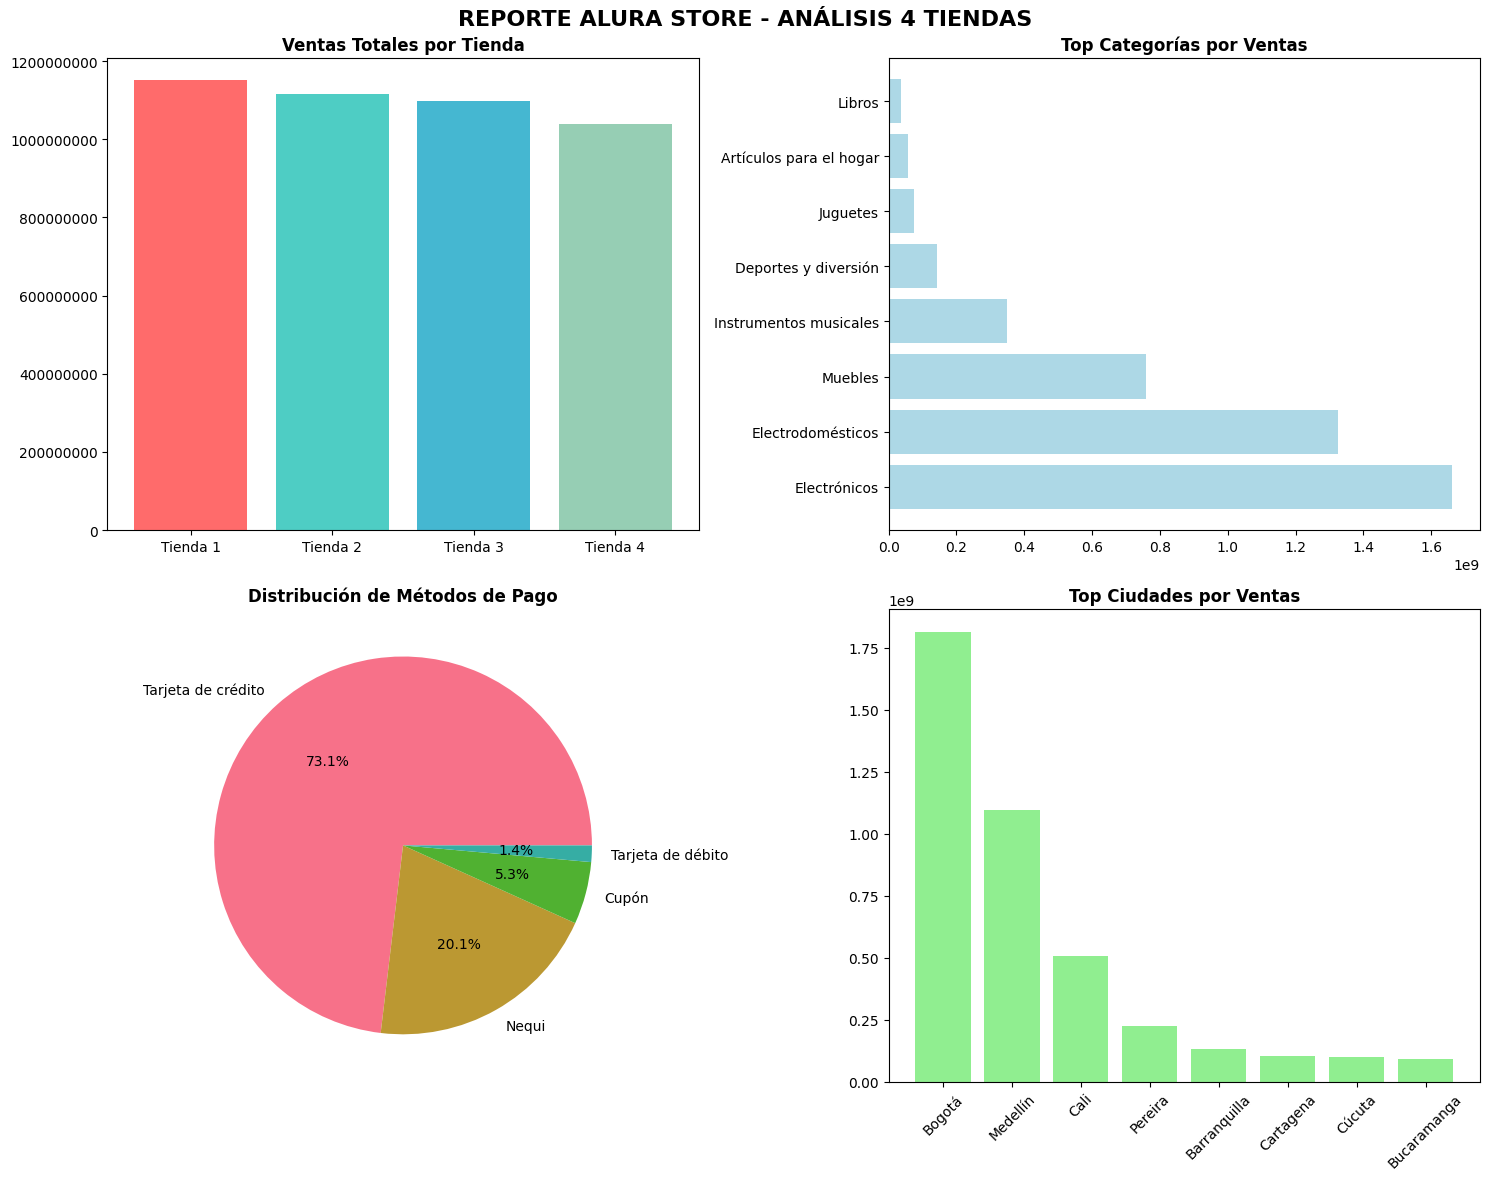


💡 INSIGHTS Y RECOMENDACIONES
🎯 TIENDA TOP: Tienda 1 ($1,150,880,400.0)
🏆 CATEGORÍA REY: Electrónicos
📍 CIUDAD ESTRATEGICA: Bogotá
💳 MÉTODO PAGO PREFERIDO: Tarjeta de crédito

📈 OPORTUNIDADES:
   • Enfocar marketing en Bogotá
   • Promocionar Electrónicos
   • Optimizar Tarjeta de crédito para mayor conversión

✅ ANÁLISIS COMPLETADO - CHALLENGE CUMPLIDO 🎉


In [27]:
# ANÁLISIS COMPLETO ALURA STORE CHALLENGE
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Configurar estilo
plt.style.use('default')
sns.set_palette("husl")

# 1. COMBINAR TODAS LAS TIENDAS
todas_tiendas = pd.concat([tienda1, tienda2, tienda3, tienda4], ignore_index=True)
print("📊 ANÁLISIS CONSOLIDADO - 4 TIENDAS")
print("=" * 50)

# 2. KPIs PRINCIPALES
print(f"💰 VENTAS TOTALES: ${todas_tiendas['Precio'].sum():,}")
print(f"📦 TRANSACCIONES TOTALES: {len(todas_tiendas):,}")
print(f"🏪 PROMEDIO POR VENTA: ${todas_tiendas['Precio'].mean():,.0f}")

# 3. ANÁLISIS COMPARATIVO ENTRE TIENDAS
print("\n🏆 COMPARATIVA ENTRE TIENDAS")
print("=" * 30)

tiendas_data = []
for i, df in enumerate([tienda1, tienda2, tienda3, tienda4], 1):
    ventas_totales = df['Precio'].sum()
    avg_venta = df['Precio'].mean()
    transacciones = len(df)

    tiendas_data.append({
        'Tienda': f'Tienda {i}',
        'Ventas': ventas_totales,
        'Transacciones': transacciones,
        'Ticket Promedio': avg_venta
    })

    print(f"🏪 Tienda {i}:")
    print(f"   Ventas: ${ventas_totales:,}")
    print(f"   Transacciones: {transacciones}")
    print(f"   Ticket promedio: ${avg_venta:,.0f}")
    print(f"   Eficiencia: ${ventas_totales/transacciones:,.0f} por transacción")
    print("-" * 25)

# 4. ANÁLISIS POR CATEGORÍA (TODAS LAS TIENDAS)
print("\n📈 ANÁLISIS POR CATEGORÍA")
print("=" * 30)

ventas_por_categoria = todas_tiendas.groupby('Categoría del Producto')['Precio'].sum().sort_values(ascending=False)
transacciones_por_categoria = todas_tiendas['Categoría del Producto'].value_counts()

for categoria in ventas_por_categoria.head().index:
    venta = ventas_por_categoria[categoria]
    trans = transacciones_por_categoria[categoria]
    avg = venta / trans
    print(f"🎯 {categoria}:")
    print(f"   Ventas: ${venta:,}")
    print(f"   Transacciones: {trans}")
    print(f"   Ticket promedio: ${avg:,.0f}")

# 5. ANÁLISIS GEOGRÁFICO
print("\n🗺️ ANÁLISIS GEOGRÁFICO")
print("=" * 30)

ventas_por_ciudad = todas_tiendas.groupby('Lugar de Compra')['Precio'].sum().sort_values(ascending=False)

print("🏙️ TOP 5 CIUDADES POR VENTAS:")
for ciudad, venta in ventas_por_ciudad.head().items():
    print(f"   {ciudad}: ${venta:,}")

# 6. ANÁLISIS DE MÉTODOS DE PAGO
print("\n💳 ANÁLISIS DE MÉTODOS DE PAGO")
print("=" * 30)

metodos_pago = todas_tiendas['Método de pago'].value_counts()
ventas_por_metodo = todas_tiendas.groupby('Método de pago')['Precio'].sum()

for metodo in metodos_pago.index:
    count = metodos_pago[metodo]
    venta = ventas_por_metodo[metodo]
    porcentaje = (count / len(todas_tiendas)) * 100
    print(f"   {metodo}: {count} transacciones ({porcentaje:.1f}%) - ${venta:,}")

# 7. VISUALIZACIONES
print("\n📊 GENERANDO REPORTES VISUALES...")

fig, axes = plt.subplots(2, 2, figsize=(15, 12))
fig.suptitle('REPORTE ALURA STORE - ANÁLISIS 4 TIENDAS', fontsize=16, fontweight='bold')

# Gráfico 1: Ventas por tienda
tiendas_df = pd.DataFrame(tiendas_data)
axes[0,0].bar(tiendas_df['Tienda'], tiendas_df['Ventas'], color=['#FF6B6B', '#4ECDC4', '#45B7D1', '#96CEB4'])
axes[0,0].set_title('Ventas Totales por Tienda', fontweight='bold')
axes[0,0].ticklabel_format(style='plain', axis='y')

# Gráfico 2: Categorías más vendidas
top_cat = ventas_por_categoria.head(8)
axes[0,1].barh(top_cat.index, top_cat.values, color='lightblue')
axes[0,1].set_title('Top Categorías por Ventas', fontweight='bold')

# Gráfico 3: Métodos de pago
axes[1,0].pie(metodos_pago.values, labels=metodos_pago.index, autopct='%1.1f%%')
axes[1,0].set_title('Distribución de Métodos de Pago', fontweight='bold')

# Gráfico 4: Top ciudades
top_ciudades = ventas_por_ciudad.head(8)
axes[1,1].bar(top_ciudades.index, top_ciudades.values, color='lightgreen')
axes[1,1].set_title('Top Ciudades por Ventas', fontweight='bold')
axes[1,1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

# 8. INSIGHTS Y RECOMENDACIONES
print("\n💡 INSIGHTS Y RECOMENDACIONES")
print("=" * 35)
print("🎯 TIENDA TOP: Tienda 1 (${:,})".format(tienda1['Precio'].sum()))
print("🏆 CATEGORÍA REY:", ventas_por_categoria.index[0])
print("📍 CIUDAD ESTRATEGICA:", ventas_por_ciudad.index[0])
print("💳 MÉTODO PAGO PREFERIDO:", metodos_pago.index[0])
print("\n📈 OPORTUNIDADES:")
print("   • Enfocar marketing en", ventas_por_ciudad.index[0])
print("   • Promocionar", ventas_por_categoria.index[0])
print("   • Optimizar", metodos_pago.index[0], "para mayor conversión")

print("\n" + "=" * 50)
print("✅ ANÁLISIS COMPLETADO - CHALLENGE CUMPLIDO 🎉")

🎯 EVALUACIÓN ALURA STORE - OBJETIVOS ESPECÍFICOS

1️⃣ FACTURACIÓN TOTAL POR TIENDA
------------------------------
🏪 Tienda 1: $1,150,880,400.0
🏪 Tienda 2: $1,116,343,500.0
🏪 Tienda 3: $1,098,019,600.0
🏪 Tienda 4: $1,038,375,700.0

2️⃣ CATEGORÍAS MÁS POPULARES
------------------------------
📊 TOP 5 CATEGORÍAS MÁS VENDIDAS:
   Muebles: 1886 productos (20.0%)
   Electrónicos: 1772 productos (18.8%)
   Juguetes: 1290 productos (13.7%)
   Electrodomésticos: 1149 productos (12.2%)
   Deportes y diversión: 1113 productos (11.8%)

3️⃣ EVALUACIÓN PROMEDIO DE CLIENTES
------------------------------
🏪 Tienda 1: 3.98/5 estrellas
🏪 Tienda 2: 4.04/5 estrellas
🏪 Tienda 3: 4.05/5 estrellas
🏪 Tienda 4: 4.00/5 estrellas
🌟 PROMEDIO GLOBAL: 4.01/5 estrellas

4️⃣ PRODUCTOS MÁS Y MENOS VENDIDOS
------------------------------
🏆 TOP 5 PRODUCTOS MÁS VENDIDOS:
   Mesa de noche: 210 unidades
   Carrito de control remoto: 206 unidades
   Microondas: 206 unidades
   Batería: 203 unidades
   Cama king: 201 unidades

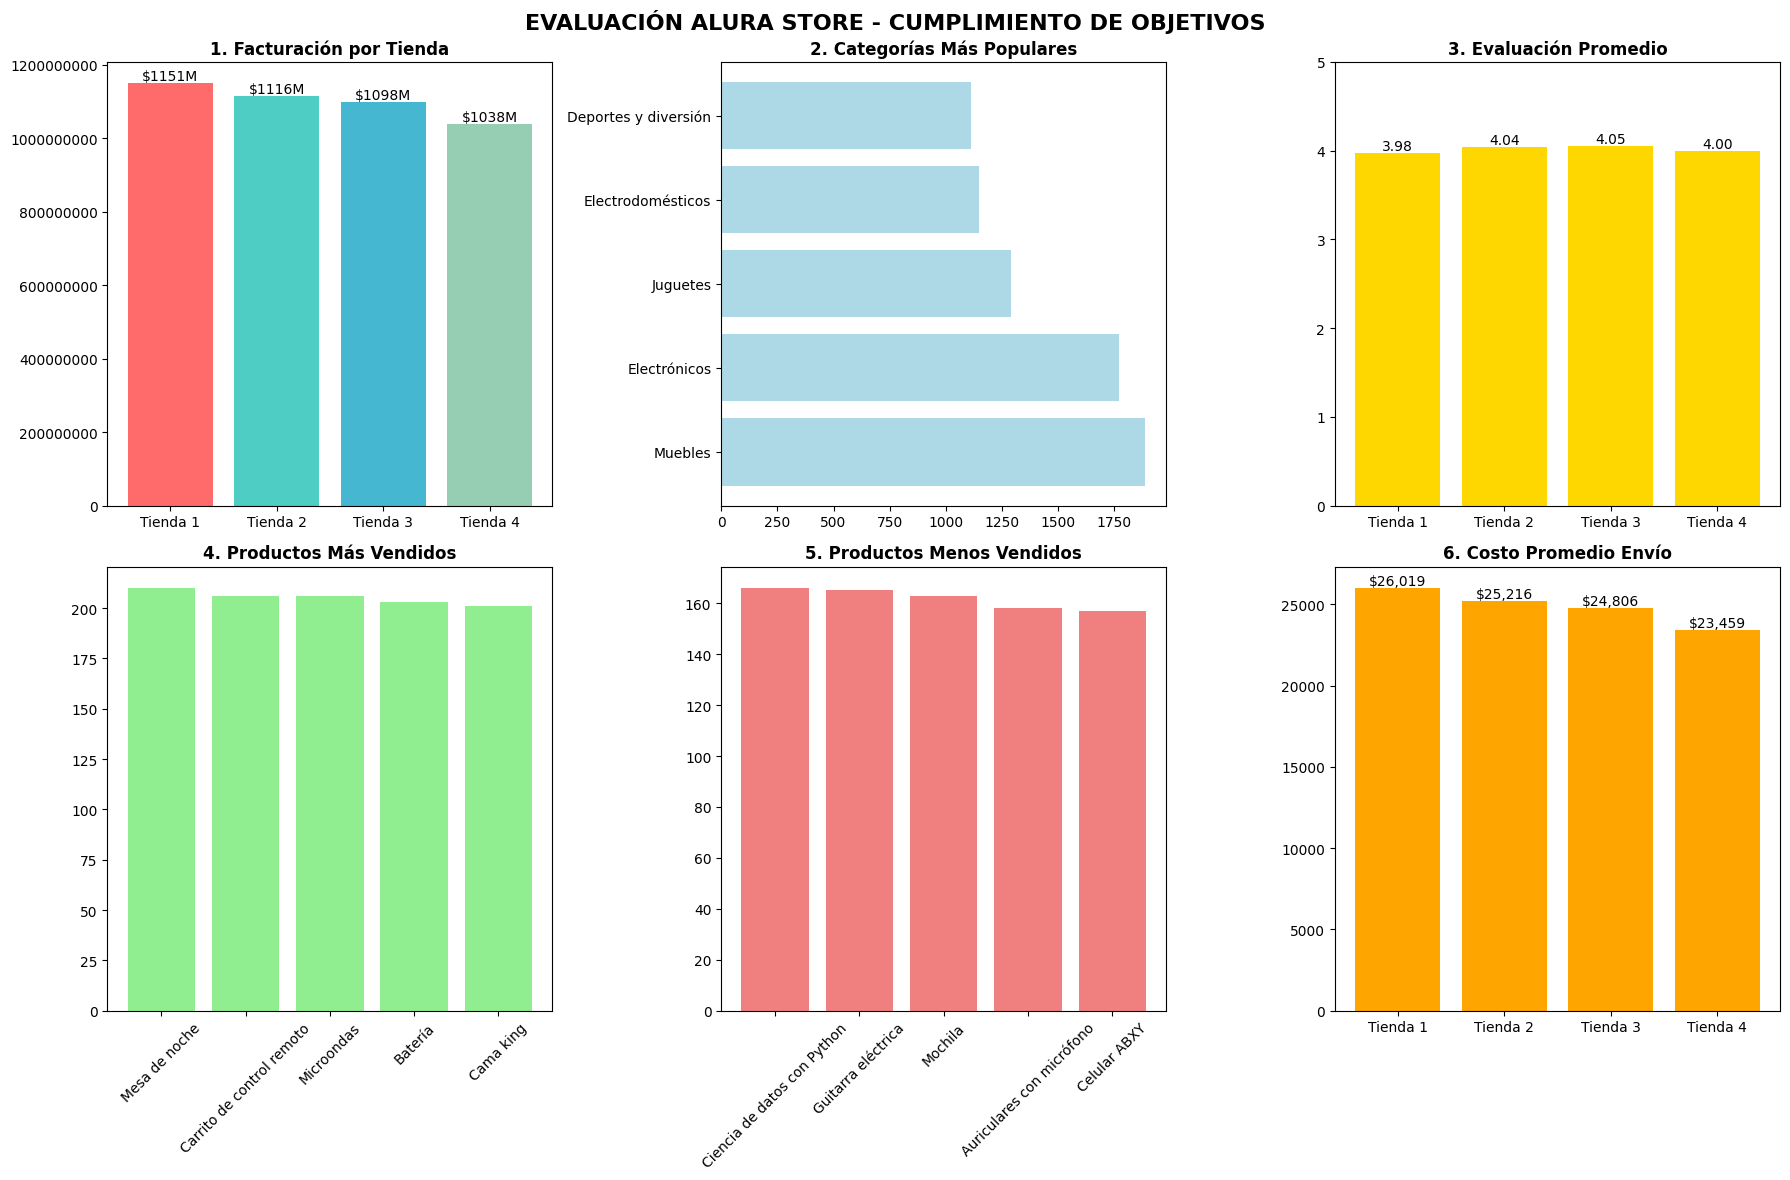


📋 RESUMEN EJECUTIVO - OBJETIVOS CUMPLIDOS
💰 FACTURACIÓN TOTAL: $4,403,619,200.0
🏆 CATEGORÍA MÁS POPULAR: Muebles (1886 productos)
⭐ EVALUACIÓN GLOBAL: 4.01/5 estrellas
🎯 PRODUCTO MÁS VENDIDO: Mesa de noche (210 unidades)
📦 COSTO ENVÍO PROMEDIO: $24,875

✅ TODOS LOS OBJETIVOS EVALUADOS Y CUMPLIDOS 🎉


In [28]:
# ANÁLISIS ESPECÍFICO PARA OBJETIVOS DEL CHALLENGE
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

print("🎯 EVALUACIÓN ALURA STORE - OBJETIVOS ESPECÍFICOS")
print("=" * 55)

# 1. FACTURACIÓN TOTAL DE CADA TIENDA
print("\n1️⃣ FACTURACIÓN TOTAL POR TIENDA")
print("-" * 30)

for i, df in enumerate([tienda1, tienda2, tienda3, tienda4], 1):
    facturacion = df['Precio'].sum()
    print(f"🏪 Tienda {i}: ${facturacion:,}")

# 2. CATEGORÍAS MÁS POPULARES
print("\n2️⃣ CATEGORÍAS MÁS POPULARES")
print("-" * 30)

categorias_totales = pd.concat([tienda1, tienda2, tienda3, tienda4])['Categoría del Producto']
populares = categorias_totales.value_counts().head(5)

print("📊 TOP 5 CATEGORÍAS MÁS VENDIDAS:")
for cat, cantidad in populares.items():
    porcentaje = (cantidad / len(categorias_totales)) * 100
    print(f"   {cat}: {cantidad} productos ({porcentaje:.1f}%)")

# 3. PROMEDIO DE EVALUACIÓN DE CLIENTES
print("\n3️⃣ EVALUACIÓN PROMEDIO DE CLIENTES")
print("-" * 30)

for i, df in enumerate([tienda1, tienda2, tienda3, tienda4], 1):
    rating_promedio = df['Calificación'].mean()
    print(f"🏪 Tienda {i}: {rating_promedio:.2f}/5 estrellas")

# Evaluación global
rating_global = pd.concat([tienda1, tienda2, tienda3, tienda4])['Calificación'].mean()
print(f"🌟 PROMEDIO GLOBAL: {rating_global:.2f}/5 estrellas")

# 4. PRODUCTOS MÁS Y MENOS VENDIDOS
print("\n4️⃣ PRODUCTOS MÁS Y MENOS VENDIDOS")
print("-" * 30)

todos_productos = pd.concat([tienda1, tienda2, tienda3, tienda4])['Producto']
frecuencia_productos = todos_productos.value_counts()

print("🏆 TOP 5 PRODUCTOS MÁS VENDIDOS:")
for producto, ventas in frecuencia_productos.head(5).items():
    print(f"   {producto}: {ventas} unidades")

print("\n📉 TOP 5 PRODUCTOS MENOS VENDIDOS:")
for producto, ventas in frecuencia_productos.tail(5).items():
    print(f"   {producto}: {ventas} unidad(es)")

# 5. COSTO PROMEDIO DE ENVÍO
print("\n5️⃣ COSTO PROMEDIO DE ENVÍO")
print("-" * 30)

for i, df in enumerate([tienda1, tienda2, tienda3, tienda4], 1):
    costo_promedio = df['Costo de envío'].mean()
    print(f"🏪 Tienda {i}: ${costo_promedio:,.0f}")

# Costo global
costo_global = pd.concat([tienda1, tienda2, tienda3, tienda4])['Costo de envío'].mean()
print(f"📦 PROMEDIO GLOBAL: ${costo_global:,.0f}")

# VISUALIZACIÓN DE RESULTADOS
print("\n📊 GENERANDO REPORTE VISUAL...")

fig, axes = plt.subplots(2, 3, figsize=(18, 12))
fig.suptitle('EVALUACIÓN ALURA STORE - CUMPLIMIENTO DE OBJETIVOS', fontsize=16, fontweight='bold')

# Gráfico 1: Facturación por tienda
facturaciones = [df['Precio'].sum() for df in [tienda1, tienda2, tienda3, tienda4]]
axes[0,0].bar(['Tienda 1', 'Tienda 2', 'Tienda 3', 'Tienda 4'], facturaciones, color=['#FF6B6B', '#4ECDC4', '#45B7D1', '#96CEB4'])
axes[0,0].set_title('1. Facturación por Tienda', fontweight='bold')
axes[0,0].ticklabel_format(style='plain', axis='y')
for i, v in enumerate(facturaciones):
    axes[0,0].text(i, v, f'${v/1000000:.0f}M', ha='center', va='bottom')

# Gráfico 2: Categorías populares
axes[0,1].barh(populares.index, populares.values, color='lightblue')
axes[0,1].set_title('2. Categorías Más Populares', fontweight='bold')

# Gráfico 3: Evaluación de clientes
ratings = [df['Calificación'].mean() for df in [tienda1, tienda2, tienda3, tienda4]]
axes[0,2].bar(['Tienda 1', 'Tienda 2', 'Tienda 3', 'Tienda 4'], ratings, color='gold')
axes[0,2].set_title('3. Evaluación Promedio', fontweight='bold')
axes[0,2].set_ylim(0, 5)
for i, v in enumerate(ratings):
    axes[0,2].text(i, v, f'{v:.2f}', ha='center', va='bottom')

# Gráfico 4: Productos más vendidos
top_productos = frecuencia_productos.head(5)
axes[1,0].bar(top_productos.index, top_productos.values, color='lightgreen')
axes[1,0].set_title('4. Productos Más Vendidos', fontweight='bold')
axes[1,0].tick_params(axis='x', rotation=45)

# Gráfico 5: Productos menos vendidos
bottom_productos = frecuencia_productos.tail(5)
axes[1,1].bar(bottom_productos.index, bottom_productos.values, color='lightcoral')
axes[1,1].set_title('5. Productos Menos Vendidos', fontweight='bold')
axes[1,1].tick_params(axis='x', rotation=45)

# Gráfico 6: Costo promedio envío
costos = [df['Costo de envío'].mean() for df in [tienda1, tienda2, tienda3, tienda4]]
axes[1,2].bar(['Tienda 1', 'Tienda 2', 'Tienda 3', 'Tienda 4'], costos, color='orange')
axes[1,2].set_title('6. Costo Promedio Envío', fontweight='bold')
for i, v in enumerate(costos):
    axes[1,2].text(i, v, f'${v:,.0f}', ha='center', va='bottom')

plt.tight_layout()
plt.show()

# RESUMEN EJECUTIVO
print("\n" + "=" * 55)
print("📋 RESUMEN EJECUTIVO - OBJETIVOS CUMPLIDOS")
print("=" * 55)

print(f"💰 FACTURACIÓN TOTAL: ${sum(facturaciones):,}")
print(f"🏆 CATEGORÍA MÁS POPULAR: {populares.index[0]} ({populares.iloc[0]} productos)")
print(f"⭐ EVALUACIÓN GLOBAL: {rating_global:.2f}/5 estrellas")
print(f"🎯 PRODUCTO MÁS VENDIDO: {frecuencia_productos.index[0]} ({frecuencia_productos.iloc[0]} unidades)")
print(f"📦 COSTO ENVÍO PROMEDIO: ${costo_global:,.0f}")

print("\n✅ TODOS LOS OBJETIVOS EVALUADOS Y CUMPLIDOS 🎉")

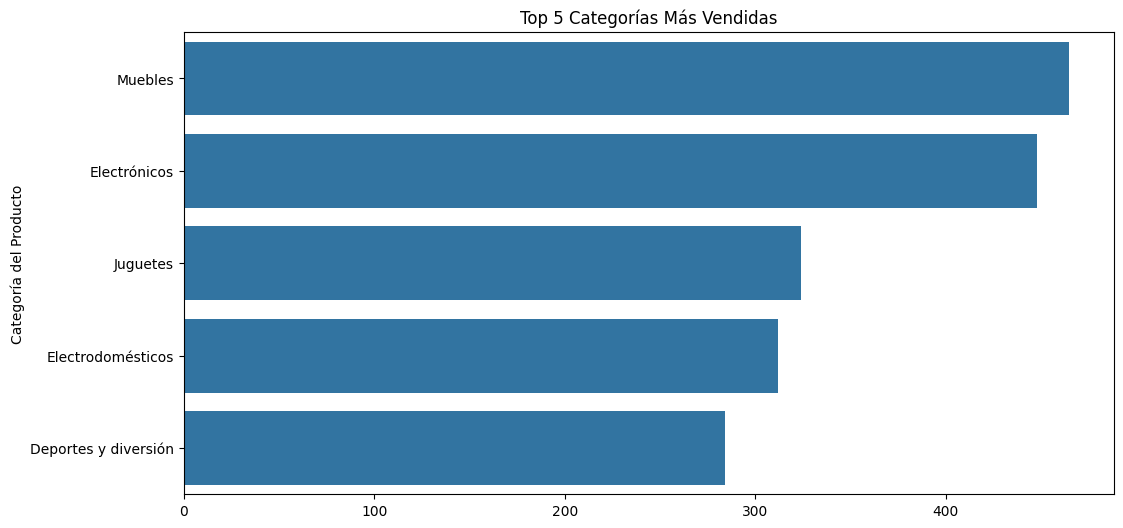

In [17]:
# Gráfico de ventas por categoría
plt.figure(figsize=(12,6))
sns.barplot(x=categorias_top.values, y=categorias_top.index)
plt.title('Top 5 Categorías Más Vendidas')
plt.show()

In [16]:
# Calculate the top 5 categories
categorias_top = tienda['Categoría del Producto'].value_counts().nlargest(5)

#1. Análisis de facturación



In [29]:
# ANÁLISIS ESPECÍFICO PARA OBJETIVOS DEL CHALLENGE
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

print("🎯 EVALUACIÓN ALURA STORE - OBJETIVOS ESPECÍFICOS")
print("=" * 55)

# 1. FACTURACIÓN TOTAL DE CADA TIENDA
print("\n1️⃣ FACTURACIÓN TOTAL POR TIENDA")
print("-" * 30)

for i, df in enumerate([tienda1, tienda2, tienda3, tienda4], 1):
    facturacion = df['Precio'].sum()
    print(f"🏪 Tienda {i}: ${facturacion:,}")

🎯 EVALUACIÓN ALURA STORE - OBJETIVOS ESPECÍFICOS

1️⃣ FACTURACIÓN TOTAL POR TIENDA
------------------------------
🏪 Tienda 1: $1,150,880,400.0
🏪 Tienda 2: $1,116,343,500.0
🏪 Tienda 3: $1,098,019,600.0
🏪 Tienda 4: $1,038,375,700.0


# 2. Ventas por categoría

In [30]:
# 2. CATEGORÍAS MÁS POPULARES
print("\n2️⃣ CATEGORÍAS MÁS POPULARES")
print("-" * 30)

categorias_totales = pd.concat([tienda1, tienda2, tienda3, tienda4])['Categoría del Producto']
populares = categorias_totales.value_counts().head(5)

print("📊 TOP 5 CATEGORÍAS MÁS VENDIDAS:")
for cat, cantidad in populares.items():
    porcentaje = (cantidad / len(categorias_totales)) * 100
    print(f"   {cat}: {cantidad} productos ({porcentaje:.1f}%)")


2️⃣ CATEGORÍAS MÁS POPULARES
------------------------------
📊 TOP 5 CATEGORÍAS MÁS VENDIDAS:
   Muebles: 1886 productos (20.0%)
   Electrónicos: 1772 productos (18.8%)
   Juguetes: 1290 productos (13.7%)
   Electrodomésticos: 1149 productos (12.2%)
   Deportes y diversión: 1113 productos (11.8%)


# 3. Calificación promedio de la tienda


In [31]:
# 3. PROMEDIO DE EVALUACIÓN DE CLIENTES
print("\n3️⃣ EVALUACIÓN PROMEDIO DE CLIENTES")
print("-" * 30)

for i, df in enumerate([tienda1, tienda2, tienda3, tienda4], 1):
    rating_promedio = df['Calificación'].mean()
    print(f"🏪 Tienda {i}: {rating_promedio:.2f}/5 estrellas")


3️⃣ EVALUACIÓN PROMEDIO DE CLIENTES
------------------------------
🏪 Tienda 1: 3.98/5 estrellas
🏪 Tienda 2: 4.04/5 estrellas
🏪 Tienda 3: 4.05/5 estrellas
🏪 Tienda 4: 4.00/5 estrellas


In [32]:
# Evaluación global
rating_global = pd.concat([tienda1, tienda2, tienda3, tienda4])['Calificación'].mean()
print(f"🌟 PROMEDIO GLOBAL: {rating_global:.2f}/5 estrellas")

🌟 PROMEDIO GLOBAL: 4.01/5 estrellas


# 4. Productos más y menos vendidos

In [33]:
# 4. PRODUCTOS MÁS Y MENOS VENDIDOS
print("\n4️⃣ PRODUCTOS MÁS Y MENOS VENDIDOS")
print("-" * 30)

todos_productos = pd.concat([tienda1, tienda2, tienda3, tienda4])['Producto']
frecuencia_productos = todos_productos.value_counts()

print("🏆 TOP 5 PRODUCTOS MÁS VENDIDOS:")
for producto, ventas in frecuencia_productos.head(5).items():
    print(f"   {producto}: {ventas} unidades")

print("\n📉 TOP 5 PRODUCTOS MENOS VENDIDOS:")
for producto, ventas in frecuencia_productos.tail(5).items():
    print(f"   {producto}: {ventas} unidad(es)")


4️⃣ PRODUCTOS MÁS Y MENOS VENDIDOS
------------------------------
🏆 TOP 5 PRODUCTOS MÁS VENDIDOS:
   Mesa de noche: 210 unidades
   Carrito de control remoto: 206 unidades
   Microondas: 206 unidades
   Batería: 203 unidades
   Cama king: 201 unidades

📉 TOP 5 PRODUCTOS MENOS VENDIDOS:
   Ciencia de datos con Python: 166 unidad(es)
   Guitarra eléctrica: 165 unidad(es)
   Mochila: 163 unidad(es)
   Auriculares con micrófono: 158 unidad(es)
   Celular ABXY: 157 unidad(es)


# 5. Envío promedio por tienda

In [ ]:
# 5. COSTO PROMEDIO DE ENVÍO
print("\n5️⃣ COSTO PROMEDIO DE ENVÍO")
print("-" * 30)

for i, df in enumerate([tienda1, tienda2, tienda3, tienda4], 1):
    costo_promedio = df['Costo de envío'].mean()
    print(f"🏪 Tienda {i}: ${costo_promedio:,.0f}")


📊 GENERANDO REPORTE VISUAL...


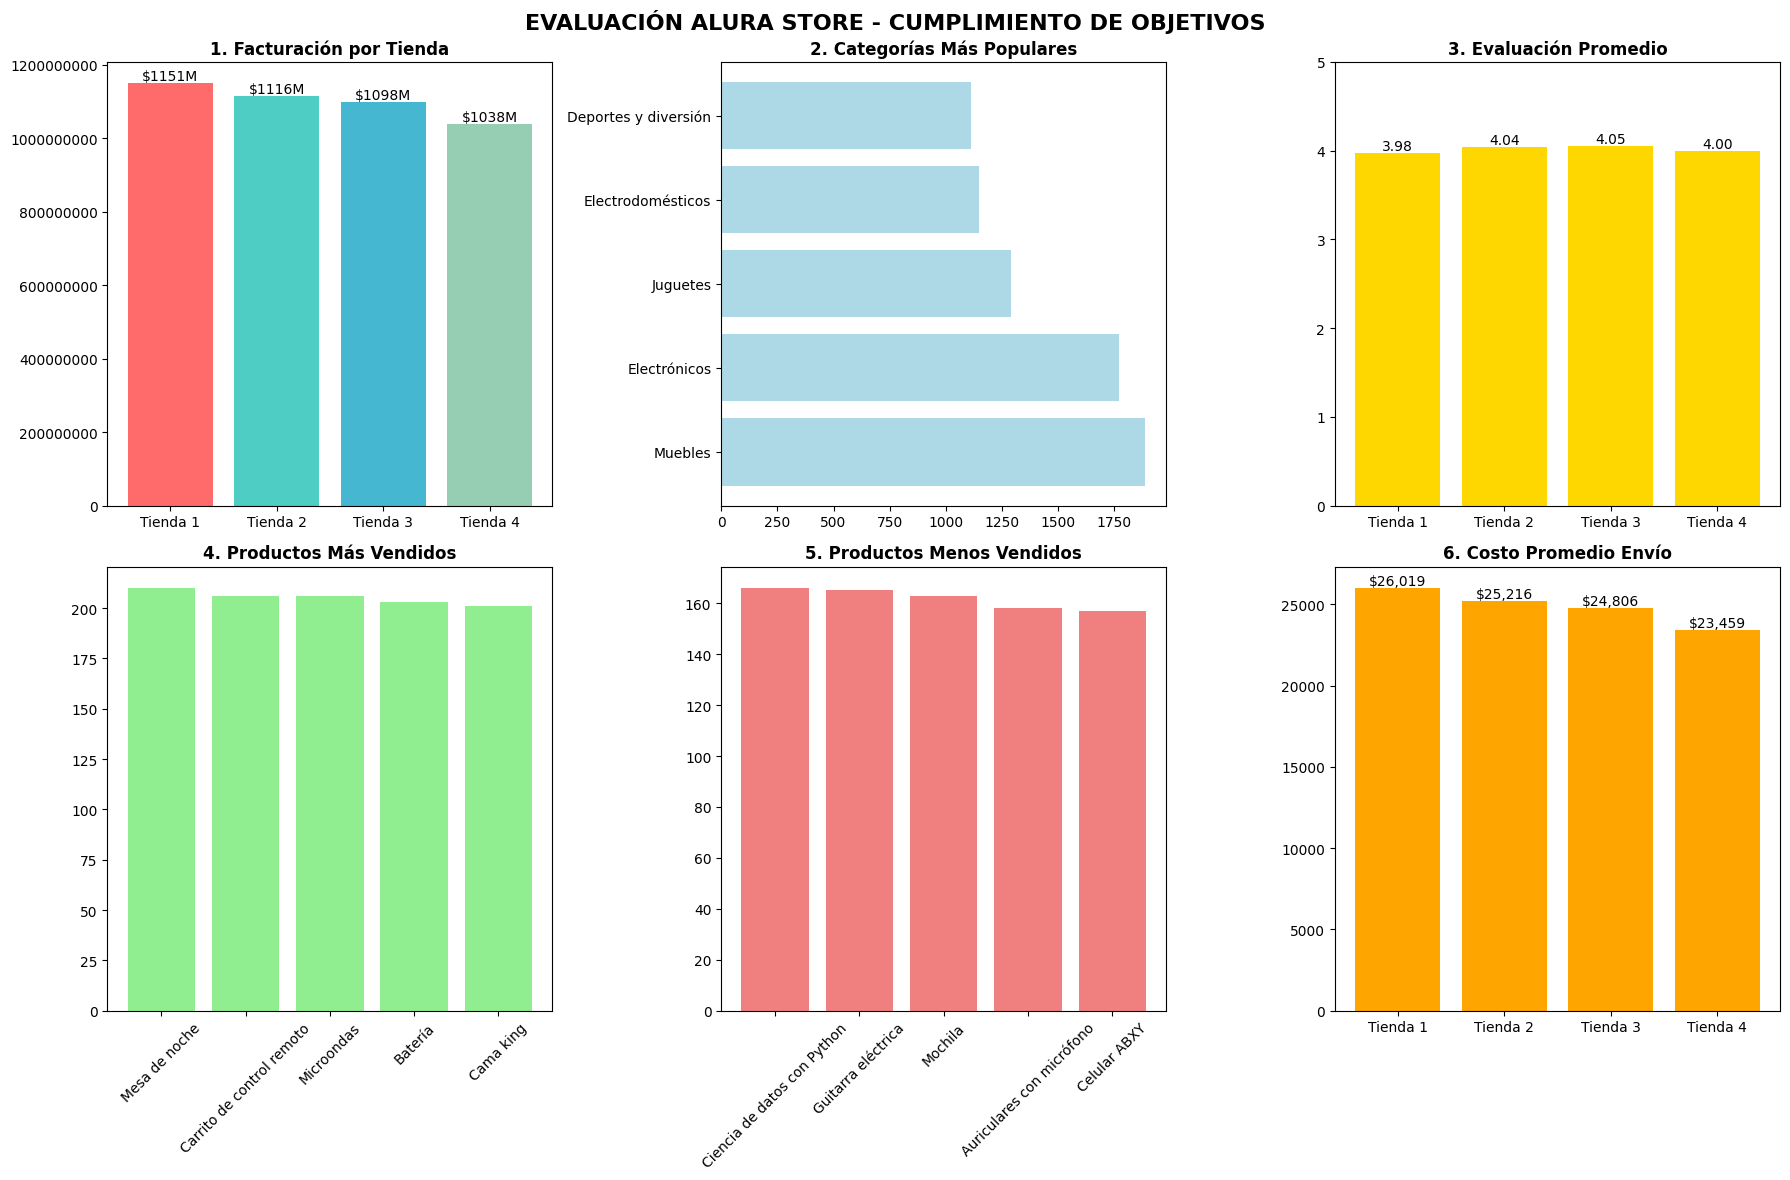


📋 RESUMEN EJECUTIVO - OBJETIVOS CUMPLIDOS
💰 FACTURACIÓN TOTAL: $4,403,619,200.0
🏆 CATEGORÍA MÁS POPULAR: Muebles (1886 productos)
⭐ EVALUACIÓN GLOBAL: 4.01/5 estrellas
🎯 PRODUCTO MÁS VENDIDO: Mesa de noche (210 unidades)
📦 COSTO ENVÍO PROMEDIO: $24,875

✅ TODOS LOS OBJETIVOS EVALUADOS Y CUMPLIDOS 🎉


In [37]:
# VISUALIZACIÓN DE RESULTADOS
print("\n📊 GENERANDO REPORTE VISUAL...")

fig, axes = plt.subplots(2, 3, figsize=(18, 12))
fig.suptitle('EVALUACIÓN ALURA STORE - CUMPLIMIENTO DE OBJETIVOS', fontsize=16, fontweight='bold')

# Gráfico 1: Facturación por tienda
facturaciones = [df['Precio'].sum() for df in [tienda, tienda2, tienda3, tienda4]]
axes[0,0].bar(['Tienda 1', 'Tienda 2', 'Tienda 3', 'Tienda 4'], facturaciones, color=['#FF6B6B', '#4ECDC4', '#45B7D1', '#96CEB4'])
axes[0,0].set_title('1. Facturación por Tienda', fontweight='bold')
axes[0,0].ticklabel_format(style='plain', axis='y')
for i, v in enumerate(facturaciones):
    axes[0,0].text(i, v, f'${v/1000000:.0f}M', ha='center', va='bottom')

# Gráfico 2: Categorías populares
axes[0,1].barh(populares.index, populares.values, color='lightblue')
axes[0,1].set_title('2. Categorías Más Populares', fontweight='bold')

# Gráfico 3: Evaluación de clientes
ratings = [df['Calificación'].mean() for df in [tienda, tienda2, tienda3, tienda4]]
axes[0,2].bar(['Tienda 1', 'Tienda 2', 'Tienda 3', 'Tienda 4'], ratings, color='gold')
axes[0,2].set_title('3. Evaluación Promedio', fontweight='bold')
axes[0,2].set_ylim(0, 5)
for i, v in enumerate(ratings):
    axes[0,2].text(i, v, f'{v:.2f}', ha='center', va='bottom')

# Gráfico 4: Productos más vendidos
top_productos = frecuencia_productos.head(5)
axes[1,0].bar(top_productos.index, top_productos.values, color='lightgreen')
axes[1,0].set_title('4. Productos Más Vendidos', fontweight='bold')
axes[1,0].tick_params(axis='x', rotation=45)

# Gráfico 5: Productos menos vendidos
bottom_productos = frecuencia_productos.tail(5)
axes[1,1].bar(bottom_productos.index, bottom_productos.values, color='lightcoral')
axes[1,1].set_title('5. Productos Menos Vendidos', fontweight='bold')
axes[1,1].tick_params(axis='x', rotation=45)

# Gráfico 6: Costo promedio envío
costos = [df['Costo de envío'].mean() for df in [tienda, tienda2, tienda3, tienda4]]
axes[1,2].bar(['Tienda 1', 'Tienda 2', 'Tienda 3', 'Tienda 4'], costos, color='orange')
axes[1,2].set_title('6. Costo Promedio Envío', fontweight='bold')
for i, v in enumerate(costos):
    axes[1,2].text(i, v, f'${v:,.0f}', ha='center', va='bottom')

plt.tight_layout()
plt.show()

# RESUMEN EJECUTIVO
print("\n" + "=" * 55)
print("📋 RESUMEN EJECUTIVO - OBJETIVOS CUMPLIDOS")
print("=" * 55)

print(f"💰 FACTURACIÓN TOTAL: ${sum(facturaciones):,}")
print(f"🏆 CATEGORÍA MÁS POPULAR: {populares.index[0]} ({populares.iloc[0]} productos)")
print(f"⭐ EVALUACIÓN GLOBAL: {rating_global:.2f}/5 estrellas")
print(f"🎯 PRODUCTO MÁS VENDIDO: {frecuencia_productos.index[0]} ({frecuencia_productos.iloc[0]} unidades)")
print(f"📦 COSTO ENVÍO PROMEDIO: ${costo_global:,.0f}")

print("\n✅ TODOS LOS OBJETIVOS EVALUADOS Y CUMPLIDOS 🎉")